# CS 429: Information Retrieval
<br>

## Lecture 22: Expectation Maximization for Clustering

<br>

### Dr. Aron Culotta
### Illinois Institute of Technology
### Spring 2015

Below, we use expectation maximization to find the means of two clusters for two-dimensional data.

We assume diagonal covariance matrices.

The bivariate normal density in this case is:

$\begin{align}
N(\vec{\mu}, \vec{\sigma}, \vec{x}) = \frac{1}{2\pi\sigma_1\sigma_2}
\exp\left(- \frac{(x_1-\mu_1)^2}{2\sigma_1^2} + \frac{(x_2-\mu_2)^2}{2\sigma_2^2}\right)
\end{align}
$

Let $\vec{\mu^j}, \vec{\sigma^j}$ be the mean and variance for cluster $j$. We update at each iteration with:


$\begin{align}
\mu_j' = \frac{\sum_i N(\vec{\mu^j}, \vec{\sigma^j}, \vec{x_i})\vec{x_i}}{\sum_i N(\vec{\mu^j}, \vec{\sigma^j}, \vec{x_i})}
\end{align}
$


Populating the interactive namespace from numpy and matplotlib


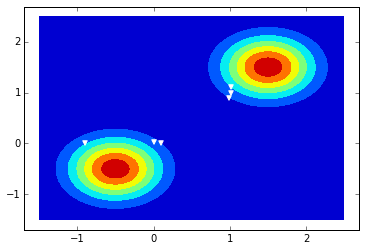

In [21]:
% pylab inline
import numpy as np
from numpy import array as npa

def gauss(mean, covar, x):
    """
    Bivariate Gaussian distribution, assuming diagonal covariance.
    1/(2*pi*v1*v2) * exp(- 1/2 * (x1-mean1)**2/v1 + (x2-mean2)**2/v2)
    """
    Xmu = x[0]-mean[0]
    Ymu = x[1]-mean[1]
    z = Xmu**2 / (covar[0]**2) + Ymu**2 / (covar[1]**2)
    denom = 2 * np.pi * covar[0] * covar[1]
    return np.exp(-z / 2.) / denom

data = np.array([npa([0.,0.02]), npa([.1,0.005]), npa([-0.9,.01]),
                 npa([1.01,1.]), npa([.99,0.9]), npa([1.02,1.1])])

mean1 = npa([-.5, -.5])
covar1 = npa([.4, .4])
mean2 = npa([1.5, 1.5])
covar2 = npa([.4, .4])

def plotme(mean1, covar1, mean2, covar2, data):
    x, y = np.mgrid[-1.5:2.5:.01, -1.5:2.5:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    contourf(x, y,
             [gauss(mean1, covar1, [xi, yi]) + gauss(mean2, covar2, [xi, yi])
              for (xi, yi) in zip(x, y)])
    scatter([d[0] for d in data], [d[1] for d in data], marker='v', color='w')

plotme(mean1, covar1, mean2, covar2, data)


new mean1= [-0.37173459  0.01202256] 
new mean2= [ 1.01010548  1.02306542]
difference in means= 1.60711708078


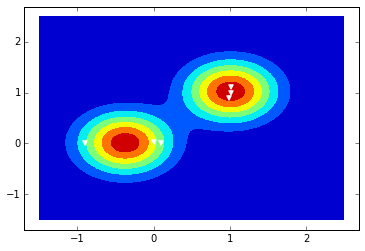

In [22]:
def e_step(data, mean1, covar1, mean2, covar2):
    return[(gauss(mean1, covar1, point), 
            gauss(mean2, covar2, point))
          for point in data]

def m_step(data, mean1, covar1, mean2, covar2, probs):
    new_mean1 = npa([0., 0.])
    new_mean2 = npa([0., 0.])
    for point, prob in zip(data, probs):
        new_mean1 += prob[0] * point
        new_mean2 += prob[1] * point
    new_mean1 /= sum(p[0] for p in probs)
    new_mean2 /= sum(p[1] for p in probs)
    return new_mean1, new_mean2

def iterate(data, mean1, covar1, mean2, covar2):
    probs = e_step(data, mean1, covar1, mean2, covar2)
    new_mean1, new_mean2 = m_step(data, mean1, covar1, mean2, covar2, probs)
    print 'new mean1=', new_mean1, '\nnew mean2=', new_mean2
    print 'difference in means=', np.sum(np.abs(new_mean1 - mean1) + np.abs(new_mean2 - mean2))
    plotme(new_mean1, covar1, new_mean2, covar2, data)
    return new_mean1, new_mean2

mean1, mean2 = iterate(data, mean1, covar1, mean2, covar2)

new mean1= [-0.20807764  0.01281648] 
new mean2= [ 1.00533049  0.99938949]
difference in means= 0.192901774886


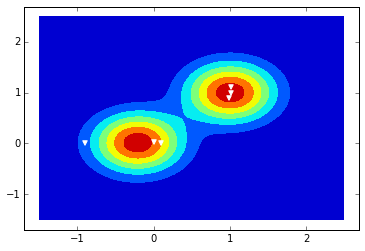

In [23]:
mean1, mean2 = iterate(data, mean1, covar1, mean2, covar2)

new mean1= [-0.06819574  0.01356879] 
new mean2= [ 1.00489053  0.99808265]
difference in means= 0.142381021534


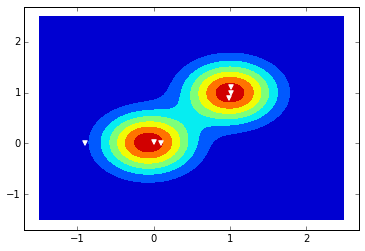

In [24]:
mean1, mean2 = iterate(data, mean1, covar1, mean2, covar2)

new mean1= [ 0.00249586  0.01402144] 
new mean2= [ 1.00445858  0.99762789]
difference in means= 0.000211134878354


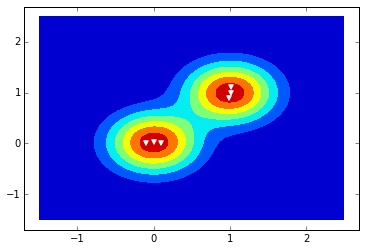

In [19]:
mean1, mean2 = iterate(data, mean1, covar1, mean2, covar2)

new mean1= [-0.00374725  0.01470823] 
new mean2= [ 1.00486266  0.99800587]
difference in means= 0.0656925689312
new mean1= [ 0.01478646  0.01566327] 
new mean2= [ 1.00486099  0.99800132]
difference in means= 0.0194949664364
new mean1= [ 0.01924769  0.0160313 ] 
new mean2= [ 1.00486089  0.99800105]
difference in means= 0.00482963668374
new mean1= [ 0.02027581  0.01612978] 
new mean2= [ 1.00486089  0.99800103]
difference in means= 0.00112661590587
new mean1= [ 0.02051052  0.0161532 ] 
new mean2= [ 1.00486089  0.99800103]
difference in means= 0.000258129418746
new mean1= [ 0.02056399  0.01615859] 
new mean2= [ 1.00486089  0.99800103]
difference in means= 5.88622176869e-05
new mean1= [ 0.02057617  0.01615982] 
new mean2= [ 1.00486089  0.99800103]
difference in means= 1.34069965188e-05
new mean1= [ 0.02057894  0.0161601 ] 
new mean2= [ 1.00486089  0.99800103]
difference in means= 3.05286745406e-06
new mean1= [ 0.02057957  0.01616016] 
new mean2= [ 1.00486089  0.99800103]
difference in means

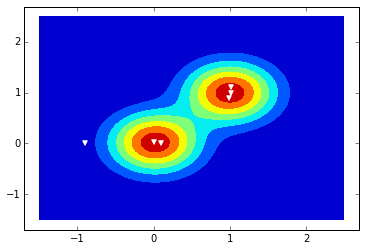

In [25]:
for i in range(10):
    mean1, mean2 = iterate(data, mean1, covar1, mean2, covar2)